<a href="https://colab.research.google.com/github/ludutram/LucianaDutra/blob/master/Dataset_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Montar o nome do caminho e arquivo no qual o dataset do ENEM foi salvo no drive
path = "/content/drive/My Drive/Colab Notebooks/data/"
dataset = path + "MICRODADOS_ENEM_2018.csv"

In [ ]:
#Coletar amostra dos dados
#Criar um dataframe com 3 milhões de registros provenientes da fonte original de dados para realizar uma analise exploratória dos dados
pd.set_option('max_rows', 1000)
pd.set_option('max_colwidth', 1000)
df = pd.read_csv(dataset, nrows=3000000, encoding='latin-1', sep=';')

In [ ]:
#Visualizar parte do dataframe gerado
df

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,0,NaN,NaN,NaN,NaN,2,0,2,1.0,0,52033333.0,5208707.0,Goiânia,52.0,GO,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,1,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,1,2111102.0,São João dos Patos,21.0,MA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CACBEEDBDDAEAEDDABAAEEAEAEEABAEDAAAACEAABADAA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAECADA,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,60.0,20.0,280.0,B,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,4209300.0,Lages,42.0,SC,1,3,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,4,C,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,2,NaN,NaN,NaN,NaN,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,4,B,A,B,C,A,A,B,A,A,A,B,A,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,1,2800308.0,Aracaju,28.0,SE,2,0,2,1.0,0,29112699.0,2918100.0,Jeremoabo,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADABECED,NaN,1.0,140.0,40.0,40.0,120.0,20.0,360.0,C,E,A,D,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,B,B,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,180010880959,2018,4106902,Curitiba,41,PR,17.0,F,0.0,1,1,4106902.0,Curitiba,41.0,PR,2,0,4,1.0,0,41602919.0,4106902.0,Curitiba,41.0,PR,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,EDCAAECBDDBCBCCBCECADBCDABDDCEDCBAEBCDCEACDCA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDECABED,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,140.0,120.0,120.0,120.0,80.0,580.0,G,F,D,D,4,L,A,C,D,C,A,B,A,B,A,B,A,B,B,B,B,E,B,B,B,B,D
2999996,180010281307,2018,3550308,São Paulo,35,SP,20.0,F,0.0,2,1,3550308.0,São Paulo,35.0,SP,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DBCABCCDDBEBACCBABBCDECCECECBDECDCCCCECDAAECA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACDCECB,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,140.0,140.0,160.0,160.0,140.0,740.0,B,F,C,D,4,G,A,B,C,B,A,B,A,A,A,B,A,A,B,B,B,D,B,A,B,A,A
2999997,180010262915,2018,4202404,Blu

In [ ]:
#Verificar como o python classifica/interpreta o tipo de cada atributo do dataset
#Poderia ter só jogado df.dtypes no bloco de código, porém, o Google Colab limita a quantidade de linhas mostradas, daí tive que percorrer os itens e imprimi-los para ver todos
serieTipos = df.dtypes
for itens in serieTipos.iteritems():
  print(str(itens[0]) + ': ' + str(itens[1]))

NU_INSCRICAO: int64
NU_ANO: int64
CO_MUNICIPIO_RESIDENCIA: int64
NO_MUNICIPIO_RESIDENCIA: object
CO_UF_RESIDENCIA: int64
SG_UF_RESIDENCIA: object
NU_IDADE: float64
TP_SEXO: object
TP_ESTADO_CIVIL: float64
TP_COR_RACA: int64
TP_NACIONALIDADE: int64
CO_MUNICIPIO_NASCIMENTO: float64
NO_MUNICIPIO_NASCIMENTO: object
CO_UF_NASCIMENTO: float64
SG_UF_NASCIMENTO: object
TP_ST_CONCLUSAO: int64
TP_ANO_CONCLUIU: int64
TP_ESCOLA: int64
TP_ENSINO: float64
IN_TREINEIRO: int64
CO_ESCOLA: float64
CO_MUNICIPIO_ESC: float64
NO_MUNICIPIO_ESC: object
CO_UF_ESC: float64
SG_UF_ESC: object
TP_DEPENDENCIA_ADM_ESC: float64
TP_LOCALIZACAO_ESC: float64
TP_SIT_FUNC_ESC: float64
IN_BAIXA_VISAO: int64
IN_CEGUEIRA: int64
IN_SURDEZ: int64
IN_DEFICIENCIA_AUDITIVA: int64
IN_SURDO_CEGUEIRA: int64
IN_DEFICIENCIA_FISICA: int64
IN_DEFICIENCIA_MENTAL: int64
IN_DEFICIT_ATENCAO: int64
IN_DISLEXIA: int64
IN_DISCALCULIA: int64
IN_AUTISMO: int64
IN_VISAO_MONOCULAR: int64
IN_OUTRA_DEF: int64
IN_GESTANTE: int64
IN_LACTANTE: int64
I

In [ ]:
#Verificar quantidade de linhas e colunas do dataset (tamanho dos dados)
df.shape

(3000000, 137)

In [ ]:
#Verificar o número de dados ausentes em cada atributo
#Colunas em que a maioria dos valores estão ausentes normalmente indicam irrelevância e podem ser descartadas
serieDadosAusentes = df.isnull().sum()
for itens in serieDadosAusentes.iteritems():
    print(str(itens[0]) + ': ' + str(itens[1]))


NU_INSCRICAO: 0
NU_ANO: 0
CO_MUNICIPIO_RESIDENCIA: 0
NO_MUNICIPIO_RESIDENCIA: 0
CO_UF_RESIDENCIA: 0
SG_UF_RESIDENCIA: 0
NU_IDADE: 32
TP_SEXO: 0
TP_ESTADO_CIVIL: 114987
TP_COR_RACA: 0
TP_NACIONALIDADE: 0
CO_MUNICIPIO_NASCIMENTO: 103998
NO_MUNICIPIO_NASCIMENTO: 103998
CO_UF_NASCIMENTO: 103998
SG_UF_NASCIMENTO: 103998
TP_ST_CONCLUSAO: 0
TP_ANO_CONCLUIU: 0
TP_ESCOLA: 0
TP_ENSINO: 877120
IN_TREINEIRO: 0
CO_ESCOLA: 2126662
CO_MUNICIPIO_ESC: 2126662
NO_MUNICIPIO_ESC: 2126662
CO_UF_ESC: 2126662
SG_UF_ESC: 2126662
TP_DEPENDENCIA_ADM_ESC: 2126662
TP_LOCALIZACAO_ESC: 2126662
TP_SIT_FUNC_ESC: 2126662
IN_BAIXA_VISAO: 0
IN_CEGUEIRA: 0
IN_SURDEZ: 0
IN_DEFICIENCIA_AUDITIVA: 0
IN_SURDO_CEGUEIRA: 0
IN_DEFICIENCIA_FISICA: 0
IN_DEFICIENCIA_MENTAL: 0
IN_DEFICIT_ATENCAO: 0
IN_DISLEXIA: 0
IN_DISCALCULIA: 0
IN_AUTISMO: 0
IN_VISAO_MONOCULAR: 0
IN_OUTRA_DEF: 0
IN_GESTANTE: 0
IN_LACTANTE: 0
IN_IDOSO: 0
IN_ESTUDA_CLASSE_HOSPITALAR: 0
IN_SEM_RECURSO: 0
IN_BRAILLE: 0
IN_AMPLIADA_24: 0
IN_AMPLIADA_18: 0
IN_LEDOR: 0


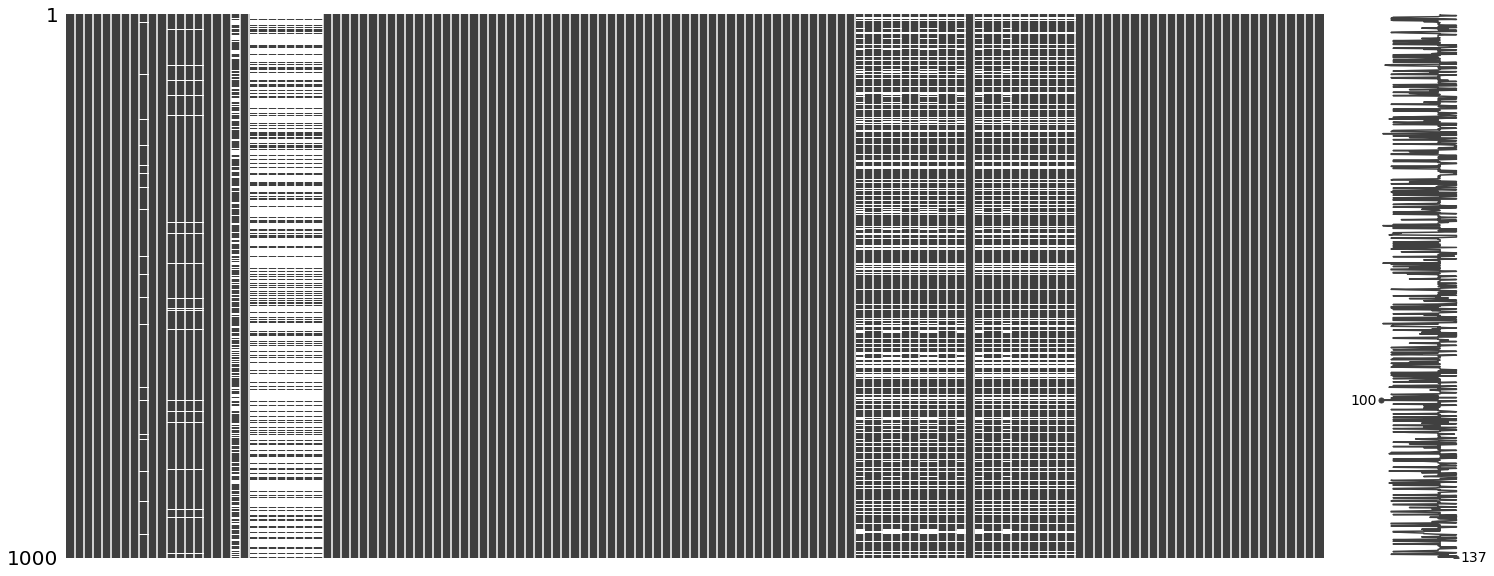

In [ ]:
#Verificar padrões nos dados ausentes
#Abaixo foi realizado uma amostra com apenas 1000 registros, porém, pode ser colocado um número maior
#Quanto maior o número, pior fica a visualização da última coluna que demonstra a ausência de dados
#Fornece uma visão geral dos dados a partir da amostra
ax = msno.matrix(df.sample(1000)) 
ax.get_figure().savefig("/content/drive/My Drive/Colab Notebooks/images/matriz_amostra_ausentes.png")

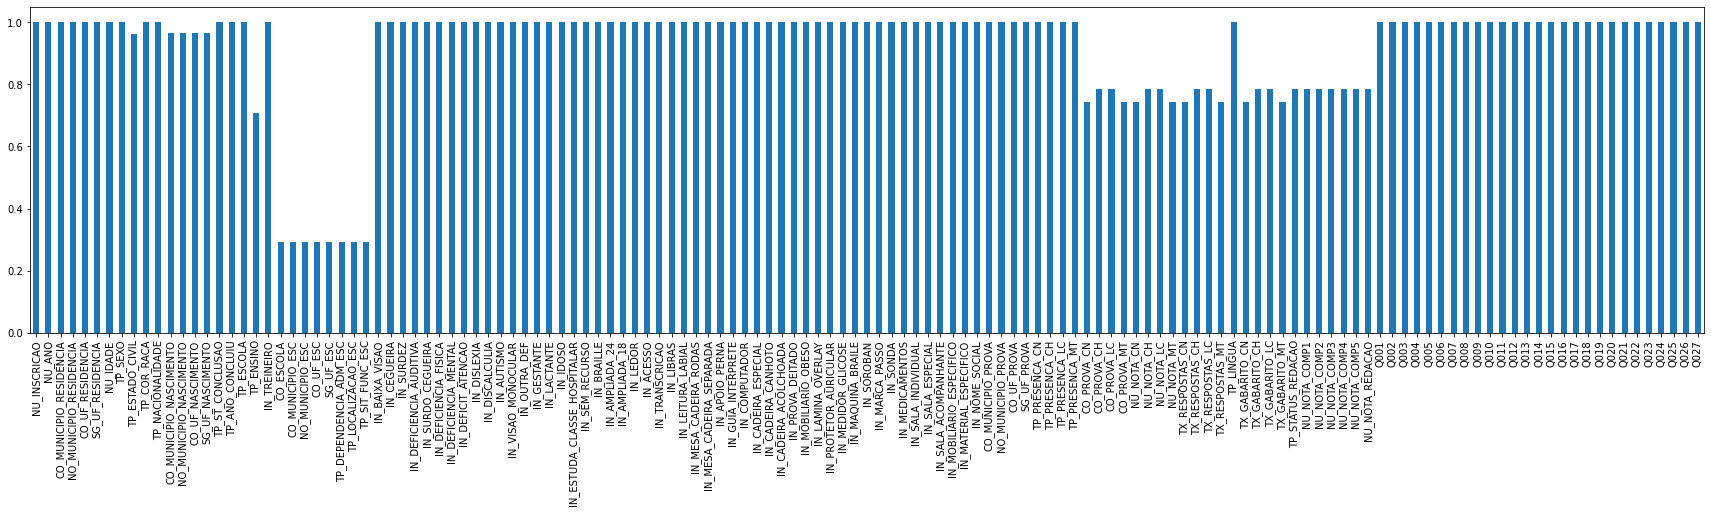

In [ ]:
#Plotar um gráfico de barras para visualizar o quantidade proporcional de itens ausentes
#Lembrando que itens ausentes são candidatos a exclusão
fig, ax = plt.subplots(figsize=(30, 6)) 
(1 - df.isnull().mean()).abs().plot.bar(ax=ax) 
fig.savefig("/content/drive/My Drive/Colab Notebooks/images/grafico_barras_ausentes.png", dpi=1200)

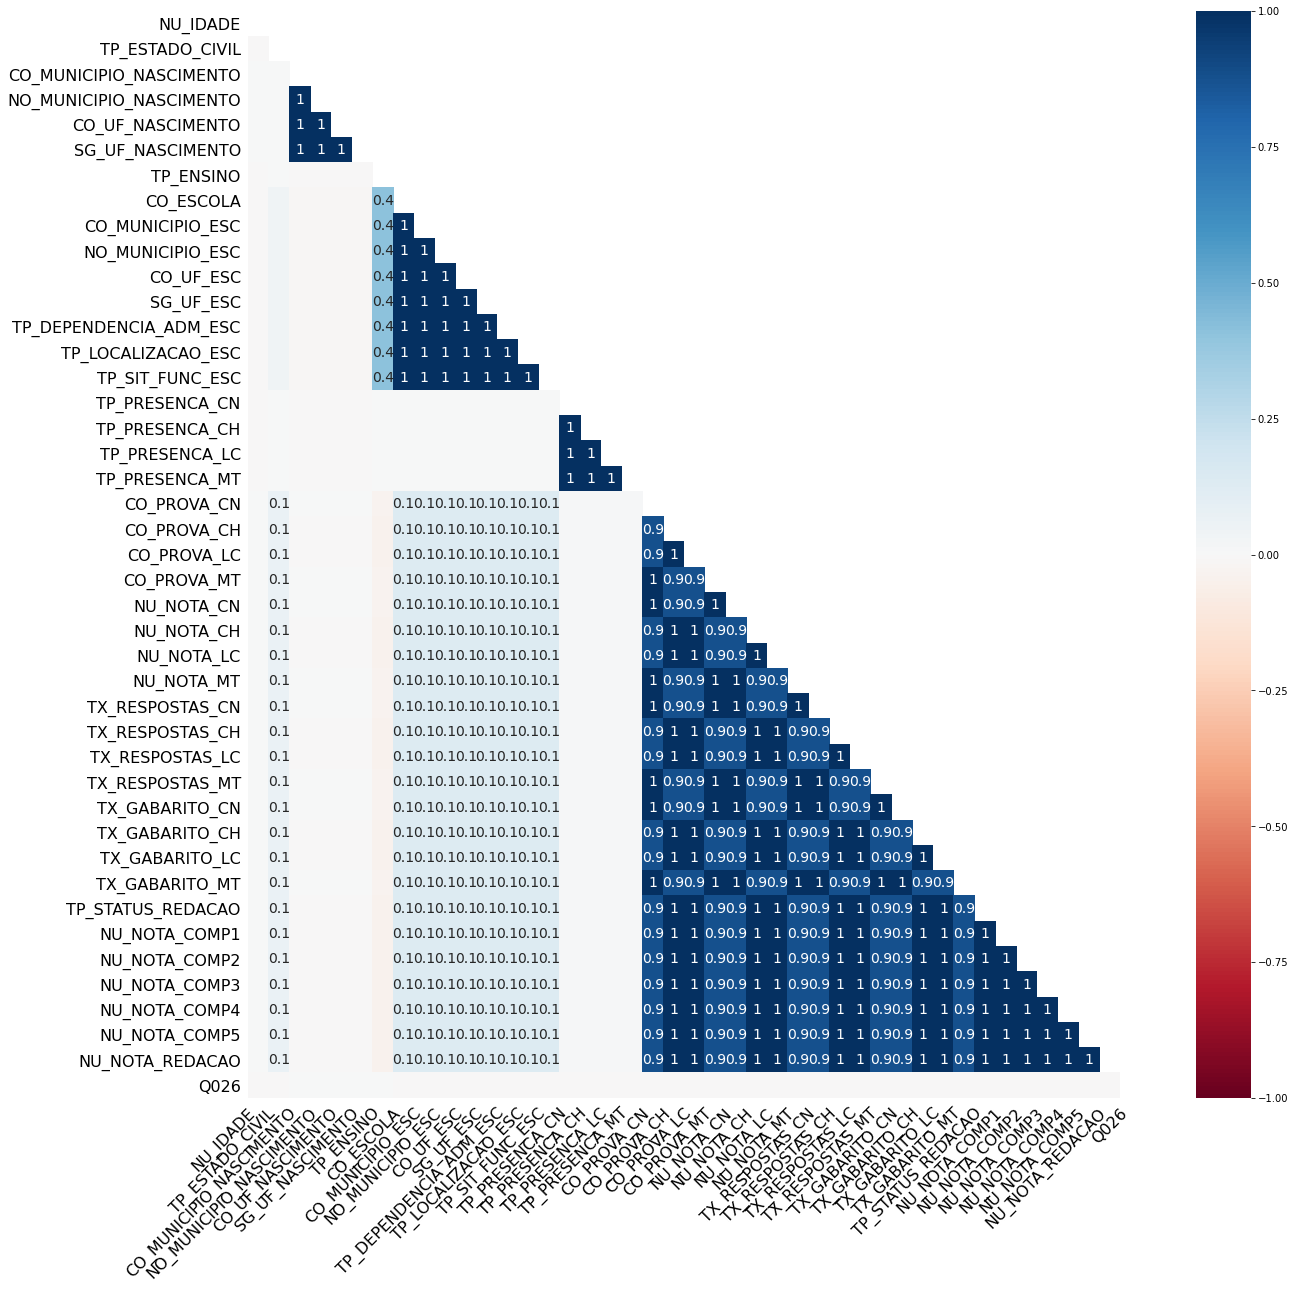

In [ ]:
#Mapa de calor demonstrado a correlação entre os atributos
ax = msno.heatmap(df, figsize=(20, 20)) 
ax.get_figure().savefig("/content/drive/My Drive/Colab Notebooks/images/mapa_calor_ausentes.png")

In [ ]:
#Verificar a porcentagem de dados ausentes em cada atributo
seriePorcentagemAusentes = df.isnull().mean() * 100
for itens in seriePorcentagemAusentes.iteritems():
    print(str(itens[0]) + ': ' + str(itens[1]))

NU_INSCRICAO: 0.0
NU_ANO: 0.0
CO_MUNICIPIO_RESIDENCIA: 0.0
NO_MUNICIPIO_RESIDENCIA: 0.0
CO_UF_RESIDENCIA: 0.0
SG_UF_RESIDENCIA: 0.0
NU_IDADE: 0.0010666666666666667
TP_SEXO: 0.0
TP_ESTADO_CIVIL: 3.8329000000000004
TP_COR_RACA: 0.0
TP_NACIONALIDADE: 0.0
CO_MUNICIPIO_NASCIMENTO: 3.4666
NO_MUNICIPIO_NASCIMENTO: 3.4666
CO_UF_NASCIMENTO: 3.4666
SG_UF_NASCIMENTO: 3.4666
TP_ST_CONCLUSAO: 0.0
TP_ANO_CONCLUIU: 0.0
TP_ESCOLA: 0.0
TP_ENSINO: 29.237333333333332
IN_TREINEIRO: 0.0
CO_ESCOLA: 70.88873333333333
CO_MUNICIPIO_ESC: 70.88873333333333
NO_MUNICIPIO_ESC: 70.88873333333333
CO_UF_ESC: 70.88873333333333
SG_UF_ESC: 70.88873333333333
TP_DEPENDENCIA_ADM_ESC: 70.88873333333333
TP_LOCALIZACAO_ESC: 70.88873333333333
TP_SIT_FUNC_ESC: 70.88873333333333
IN_BAIXA_VISAO: 0.0
IN_CEGUEIRA: 0.0
IN_SURDEZ: 0.0
IN_DEFICIENCIA_AUDITIVA: 0.0
IN_SURDO_CEGUEIRA: 0.0
IN_DEFICIENCIA_FISICA: 0.0
IN_DEFICIENCIA_MENTAL: 0.0
IN_DEFICIT_ATENCAO: 0.0
IN_DISLEXIA: 0.0
IN_DISCALCULIA: 0.0
IN_AUTISMO: 0.0
IN_VISAO_MONOCULAR: 

In [ ]:
#Verificar a estatística descritiva dos dados numéricos do dataset
#O describe() para Dataframes retorna por padrão omente dados para os atributos numérico, para incluir todos os atributos é necessário passar o parâmetro include='all'
#count = quantidade de valores
#mean = média
#std = desvio padrão
#min = valor mínimo
#
#max = valor máximo
df.describe(include='all')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.000000e+06,3000000.0,3.000000e+06,3.000000e+06,2.999968e+06,2.885013e+06,3.000000e+06,3.000000e+06,2.896002e+06,2.896002e+06,3.000000e+06,3.000000e+06,3.000000e+06,2.122880e+06,3.000000e+06,8.733380e+05,8.733380e+05,873338.000000,873338.000000,873338.000000,873338.000000,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,2.999935e+06,2.999935e+06,2.999935e+06,2.999935e+06,2.232174e+06,2.356656e+06,2.356656e+06,2.232174e+06,2.232174e+06,2.356656e+06,2.356656e+06,2.232174e+06,3.000000e+06,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,3.000000e+06
mean,1.800089e+11,2018.0,3.094265e+06,3.079262e+01,2.201831e+01,1.099229e-01,2.155161e+00,1.039266e+00,3.063763e+06,3.048609e+01,1.530062e+00,2.809609e+00,1.382093e+00,1.183350e+00,7.725033e-02,3.134020e+07,3.135875e+06,31.205042,2.312959,1.031266,1.005555,8.423333e-04,8.333333e-05,1.490000e-04,2.910000e-04,6.666667e-07,1.589333e-03,2.793333e-04,8.910000e-04,1.353333e-04,3.233333e-05,9.666667e-05,2.450000e-04,7.296667e-04,3.253333e-04,1.015000e-03,3.766667e-05,7.666667e-06,1.742667e-03,3.766667e-05,...,2.633333e-05,1.666667e-06,1.066667e-05,1.000000e-06,3.333333e-07,7.866667e-05,8.666667e-06,5.333333e-06,1.333333e-06,1.333333e-06,4.100000e-05,4.066667e-05,3.666667e-05,8.000000e-06,1.133333e-05,1.300000e-05,6.100000e-05,3.095847e+06,3.080951e+01,7.443235e-01,7.862317e-01,7.862317e-01,7.443235e-01,4.485066e+02,4.525140e+02,4.565130e+02,4.605032e+02,4.950495e+02,5.702141e+02,5.277075e+02,5.354711e+02,5.367677e-01,1.093518e+00,1.226617e+02,1.036820e+02,9.879881e+01,1.186297e+02,7.474570e+01,5.185181e+02,3.909276e+00
std,1.003842e+06,0.0,9.875286e+05,9.845571e+00,7.243657e+00,3.606242e-01,1.012189e+00,2.298722e-01,9.704750e+05,9.670776e+00,6.895185e-01,3.871457e+00,7.325555e-01,5.731197e-01,2.669883e-01,9.625608e+06,9.662566e+05,9.632990,0.789035,0.174036,0.112677,2.901076e-02,9.128330e-03,1.220565e-02,1.705624e-02,8.164964e-04,3.983476e-02,1.671094e-02,2.983633e-02,1.163250e-02,5.686150e-03,9.831447e-03,1.565056e-02,2.700249e-02,1.803407e-02,3.184290e-02,6.137203e-03,2.768864e-03,4.170888e-02,6.137203e-03,...,5.131535e-03,1.290994e-03,3.265969e-03,9.999997e-04,5.773503e-04,8.869076e-03,2.943908e-03,2.309395e-03,1.154700e-03,1.154700e-03,6.402994e-03,6.376914e-03,6.055191e-03,2.828416e-03,3.36648

In [ ]:
#Descartar colunas irrelevantes por ter vários valores ausentes
colunas = ["CO_ESCOLA", "CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC", "CO_UF_ESC", "SG_UF_ESC", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC", "TP_SIT_FUNC_ESC", "TP_ENSINO"]
df = df.drop(columns=colunas)

#Descartar colunas por serem irrelevantes para o objetivo do negócio (Ponto de vista do especialista)
colunas = ["NU_INSCRICAO", "NU_ANO", "CO_MUNICIPIO_RESIDENCIA", "CO_UF_RESIDENCIA", "CO_MUNICIPIO_NASCIMENTO", "NO_MUNICIPIO_NASCIMENTO", "CO_UF_NASCIMENTO", "SG_UF_NASCIMENTO", 
           "IN_BAIXA_VISAO", "IN_CEGUEIRA", "IN_SURDEZ", "IN_DEFICIENCIA_AUDITIVA", "IN_SURDO_CEGUEIRA", "IN_DEFICIENCIA_FISICA", "IN_DEFICIENCIA_MENTAL", "IN_DEFICIT_ATENCAO", 
           "IN_DISLEXIA", "IN_DISCALCULIA", "IN_AUTISMO", "IN_VISAO_MONOCULAR", "IN_OUTRA_DEF", "IN_GESTANTE", "IN_LACTANTE", "IN_IDOSO", "IN_ESTUDA_CLASSE_HOSPITALAR", 
           "IN_SEM_RECURSO", "IN_BRAILLE", "IN_AMPLIADA_24", "IN_AMPLIADA_18", "IN_LEDOR", "IN_ACESSO", "IN_TRANSCRICAO", "IN_LIBRAS", "IN_LEITURA_LABIAL", "IN_MESA_CADEIRA_RODAS", 
           "IN_MESA_CADEIRA_SEPARADA", "IN_APOIO_PERNA", "IN_GUIA_INTERPRETE", "IN_COMPUTADOR", "IN_CADEIRA_ESPECIAL", "IN_CADEIRA_CANHOTO", "IN_CADEIRA_ACOLCHOADA", "IN_PROVA_DEITADO", 
           "IN_MOBILIARIO_OBESO", "IN_LAMINA_OVERLAY", "IN_PROTETOR_AURICULAR", "IN_MEDIDOR_GLICOSE", "IN_SOROBAN", "IN_MARCA_PASSO", "IN_SONDA", "IN_MEDICAMENTOS", "IN_SALA_INDIVIDUAL",
           "IN_SALA_ESPECIAL", "IN_SALA_ACOMPANHANTE", "IN_MOBILIARIO_ESPECIFICO", "IN_MATERIAL_ESPECIFICO", "IN_NOME_SOCIAL", "CO_MUNICIPIO_PROVA", "CO_UF_PROVA",
           "CO_PROVA_CN", "CO_PROVA_CH", "CO_PROVA_LC", "CO_PROVA_MT", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TX_GABARITO_CN", "TX_GABARITO_CH",
           "TX_GABARITO_LC", "TX_GABARITO_MT"]
df = df.drop(columns=colunas)

'''
Comentário sobre como as colunas foram classificadas
(Irrelevante) NU_INSCRICAO: 0
(Irrelevante) NU_ANO: 0
(Irrelevante) CO_MUNICIPIO_RESIDENCIA: 0
(OK) NO_MUNICIPIO_RESIDENCIA: 0
(Irrelevante) CO_UF_RESIDENCIA: 0
(OK) SG_UF_RESIDENCIA: 0
(OK) NU_IDADE: 32
(OK) TP_SEXO: 0
(OK) TP_ESTADO_CIVIL: 114987
(OK) TP_COR_RACA: 0
(OK) TP_NACIONALIDADE: 0
(Irrelevante) CO_MUNICIPIO_NASCIMENTO: 103998
(Irrelevante) NO_MUNICIPIO_NASCIMENTO: 103998
(Irrelevante) CO_UF_NASCIMENTO: 103998
(Irrelevante) SG_UF_NASCIMENTO: 103998
(OK) TP_ST_CONCLUSAO: 0
(OK) TP_ANO_CONCLUIU: 0
(OK) TP_ESCOLA: 0
(Valores ausentes) TP_ENSINO: 877120
(OK) IN_TREINEIRO: 0
(Valores ausentes) CO_ESCOLA: 2126662
(Valores ausentes) CO_MUNICIPIO_ESC: 2126662
(Valores ausentes) NO_MUNICIPIO_ESC: 2126662
(Valores ausentes) CO_UF_ESC: 2126662
(Valores ausentes) SG_UF_ESC: 2126662
(Valores ausentes) TP_DEPENDENCIA_ADM_ESC: 2126662
(Valores ausentes) TP_LOCALIZACAO_ESC: 2126662
(Valores ausentes) TP_SIT_FUNC_ESC: 2126662
(Irrelevante) IN_BAIXA_VISAO: 0
(Irrelevante) IN_CEGUEIRA: 0
(Irrelevante) IN_SURDEZ: 0
(Irrelevante) IN_DEFICIENCIA_AUDITIVA: 0
(Irrelevante) IN_SURDO_CEGUEIRA: 0
(Irrelevante) IN_DEFICIENCIA_FISICA: 0
(Irrelevante) IN_DEFICIENCIA_MENTAL: 0
(Irrelevante) IN_DEFICIT_ATENCAO: 0
(Irrelevante) IN_DISLEXIA: 0
(Irrelevante) IN_DISCALCULIA: 0
(Irrelevante) IN_AUTISMO: 0
(Irrelevante) IN_VISAO_MONOCULAR: 0
(Irrelevante) IN_OUTRA_DEF: 0
(Irrelevante) IN_GESTANTE: 0
(Irrelevante) IN_LACTANTE: 0
(Irrelevante) IN_IDOSO: 0
(Irrelevante) IN_ESTUDA_CLASSE_HOSPITALAR: 0
(Irrelevante) IN_SEM_RECURSO: 0
(Irrelevante) IN_BRAILLE: 0
(Irrelevante) IN_AMPLIADA_24: 0
(Irrelevante) IN_AMPLIADA_18: 0
(Irrelevante) IN_LEDOR: 0
(Irrelevante) IN_ACESSO: 0
(Irrelevante) IN_TRANSCRICAO: 0
(Irrelevante) IN_LIBRAS: 0
(Irrelevante) IN_LEITURA_LABIAL: 0
(Irrelevante) IN_MESA_CADEIRA_RODAS: 0
(Irrelevante) IN_MESA_CADEIRA_SEPARADA: 0
(Irrelevante) IN_APOIO_PERNA: 0
(Irrelevante) IN_GUIA_INTERPRETE: 0
(Irrelevante) IN_COMPUTADOR: 0
(Irrelevante) IN_CADEIRA_ESPECIAL: 0
(Irrelevante) IN_CADEIRA_CANHOTO: 0
(Irrelevante) IN_CADEIRA_ACOLCHOADA: 0
(Irrelevante) IN_PROVA_DEITADO: 0
(Irrelevante) IN_MOBILIARIO_OBESO: 0
(Irrelevante) IN_LAMINA_OVERLAY: 0
(Irrelevante) IN_PROTETOR_AURICULAR: 0
(Irrelevante) IN_MEDIDOR_GLICOSE: 0
(Irrelevante) IN_MAQUINA_BRAILE: 0
(Irrelevante) IN_SOROBAN: 0
(Irrelevante) IN_MARCA_PASSO: 0
(Irrelevante) IN_SONDA: 0
(Irrelevante) IN_MEDICAMENTOS: 0
(Irrelevante) IN_SALA_INDIVIDUAL: 0
(Irrelevante) IN_SALA_ESPECIAL: 0
(Irrelevante) IN_SALA_ACOMPANHANTE: 0
(Irrelevante) IN_MOBILIARIO_ESPECIFICO: 0
(Irrelevante) IN_MATERIAL_ESPECIFICO: 0
(Irrelevante) IN_NOME_SOCIAL: 0
(Irrelevante) CO_MUNICIPIO_PROVA: 0
(OK) NO_MUNICIPIO_PROVA: 0
(Irrelevante) CO_UF_PROVA: 0
(OK) SG_UF_PROVA: 0
(leaky features) TP_PRESENCA_CN: 65
(leaky features) TP_PRESENCA_CH: 65
(leaky features) TP_PRESENCA_LC: 65
(leaky features) TP_PRESENCA_MT: 65
(Irrelevante) CO_PROVA_CN: 767826
(Irrelevante) CO_PROVA_CH: 643344
(Irrelevante) CO_PROVA_LC: 643344
(Irrelevante) CO_PROVA_MT: 767826
(leaky features) NU_NOTA_CN: 767826
(leaky features) NU_NOTA_CH: 643344
(leaky features) NU_NOTA_LC: 643344
(leaky features) NU_NOTA_MT: 767826
(Irrelevante) TX_RESPOSTAS_CN: 767826
(Irrelevante) TX_RESPOSTAS_CH: 643344
(Irrelevante) TX_RESPOSTAS_LC: 643344
(Irrelevante) TX_RESPOSTAS_MT: 767826
(OK) TP_LINGUA: 0
(Irrelevante) TX_GABARITO_CN: 767826
(Irrelevante) TX_GABARITO_CH: 643344
(Irrelevante) TX_GABARITO_LC: 643344
(Irrelevante) TX_GABARITO_MT: 767826
(leaky features) TP_STATUS_REDACAO: 643344
(leaky features) NU_NOTA_COMP1: 643344
(leaky features) NU_NOTA_COMP2: 643344
(leaky features) NU_NOTA_COMP3: 643344
(leaky features) NU_NOTA_COMP4: 643344
(leaky features) NU_NOTA_COMP5: 643344
(leaky features) NU_NOTA_REDACAO: 643344
(OK) Q001: 0
(OK) Q002: 0
(OK) Q003: 0
(OK) Q004: 0
(OK) Q005: 0
(OK) Q006: 0
(OK) Q007: 0
(OK) Q008: 0
(OK) Q009: 0
(OK) Q010: 0
(OK) Q011: 0
(OK) Q012: 0
(OK) Q013: 0
(OK) Q014: 0
(OK) Q015: 0
(OK) Q016: 0
(OK) Q017: 0
(OK) Q018: 0
(OK) Q019: 0
(OK) Q020: 0
(OK) Q021: 0
(OK) Q022: 0
(OK) Q023: 0
(OK) Q024: 0
(OK) Q025: 0
(OK) Q026: 3
(OK) Q027: 0
'''

'\n(Irrelevante) NU_INSCRICAO: 0\n(Irrelevante) NU_ANO: 0\n(Irrelevante) CO_MUNICIPIO_RESIDENCIA: 0\n(OK) NO_MUNICIPIO_RESIDENCIA: 0\n(Irrelevante) CO_UF_RESIDENCIA: 0\n(OK) SG_UF_RESIDENCIA: 0\n(OK) NU_IDADE: 32\n(OK) TP_SEXO: 0\n(OK) TP_ESTADO_CIVIL: 114987\n(OK) TP_COR_RACA: 0\n(OK) TP_NACIONALIDADE: 0\n(Irrelevante) CO_MUNICIPIO_NASCIMENTO: 103998\n(Irrelevante) NO_MUNICIPIO_NASCIMENTO: 103998\n(Irrelevante) CO_UF_NASCIMENTO: 103998\n(Irrelevante) SG_UF_NASCIMENTO: 103998\n(OK) TP_ST_CONCLUSAO: 0\n(OK) TP_ANO_CONCLUIU: 0\n(OK) TP_ESCOLA: 0\n(Valores ausentes) TP_ENSINO: 877120\n(OK) IN_TREINEIRO: 0\n(Valores ausentes) CO_ESCOLA: 2126662\n(Valores ausentes) CO_MUNICIPIO_ESC: 2126662\n(Valores ausentes) NO_MUNICIPIO_ESC: 2126662\n(Valores ausentes) CO_UF_ESC: 2126662\n(Valores ausentes) SG_UF_ESC: 2126662\n(Valores ausentes) TP_DEPENDENCIA_ADM_ESC: 2126662\n(Valores ausentes) TP_LOCALIZACAO_ESC: 2126662\n(Valores ausentes) TP_SIT_FUNC_ESC: 2126662\n(Irrelevante) IN_BAIXA_VISAO: 0\n(I

In [ ]:
#Verificar quantidade de colunas removidas do dataset
#Neste momento, observamos 57 colunas o que indica a remoção de 80 colunas
df.shape

(3000000, 57)

In [ ]:
#Criar colunas derivadas de outras colunas: 
#SOMA_NOTAS
#MEDIA_NOTAS
#CLASSE_BINARIA
df["SOMA_NOTAS"] = df["NU_NOTA_CN"] + df["NU_NOTA_CH"] + df["NU_NOTA_LC"] + df["NU_NOTA_MT"] + df["NU_NOTA_REDACAO"]
df["MEDIA_NOTAS"] = df["SOMA_NOTAS"]/5
mediana = df["MEDIA_NOTAS"].median()
df.loc[df["MEDIA_NOTAS"] <= mediana, "CLASSE_BINARIA"] = "Nao"
df.loc[df["MEDIA_NOTAS"] > mediana, "CLASSE_BINARIA"] = "Sim"

In [ ]:
#Verificar o balanceamento da classe alvo "CLASSE_BINARIA"
#Percebe-se que após calcular as colunas derivadas, alguns valores da classe alvo ficaram com o valor NaN.
#Isto indica que as colunas que auxiliaram na construção da classe alvo em algum momento também continha valores nulos.
#Os motivos podem ser os mais diversos. Exemplo:
#1) Examinando faltou o 1º e 2º dia de provas;
#2) Examinando faltou o 2º dia de provas;
#3) Inconsistência nos dados disponibilizados;
#...
df.CLASSE_BINARIA.value_counts(dropna=False)

Nao    1113410
Sim    1113175
NaN     773415
Name: CLASSE_BINARIA, dtype: int64

In [ ]:
#Remover linhas nas quais existe o valor NaN na classe alvo (CLASSE_BINARIA)
df.dropna(subset = ["CLASSE_BINARIA"], inplace=True)

In [ ]:
#Verificar se somente as linhas com o valor NaN foram removidas da classe alvo
df.CLASSE_BINARIA.value_counts(dropna=False)

Nao    1113410
Sim    1113175
Name: CLASSE_BINARIA, dtype: int64

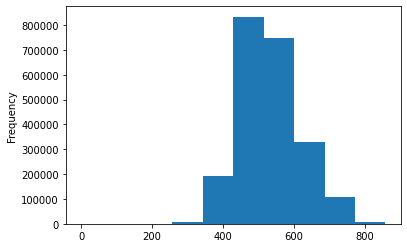

In [ ]:
#Visualizar o histograma com o histórico de média das notas
fig, ax = plt.subplots(figsize=(6, 4)) 
df.MEDIA_NOTAS.plot(kind="hist", ax=ax)
fig.savefig("/content/drive/My Drive/Colab Notebooks/images/histograma_media_notas.png", dpi=300)

In [ ]:
#Descartar colunas que causam vazamento de informações (leaky features), dependerá dos objetivos definidos pela área de negócio (problema a ser resolvido, pergunta a ser respondida, ...)
#Leaky features são aquelas variáveis que contém dados sobre o futuro ou o objetivo (clase alvo)
#Normalmente, possuem forte relação ou foram utilizadas para calcular a coluna alvo
colunas = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "TP_STATUS_REDACAO", 
            "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]

In [ ]:
#Dataset final
df.shape

(2226585, 60)

In [ ]:
#Transformar o dataframe no novo arquivo CSV
df.to_csv(path + "MICRODADOS_ENEM_2018_TRATADO_FINAL.csv", sep=",")

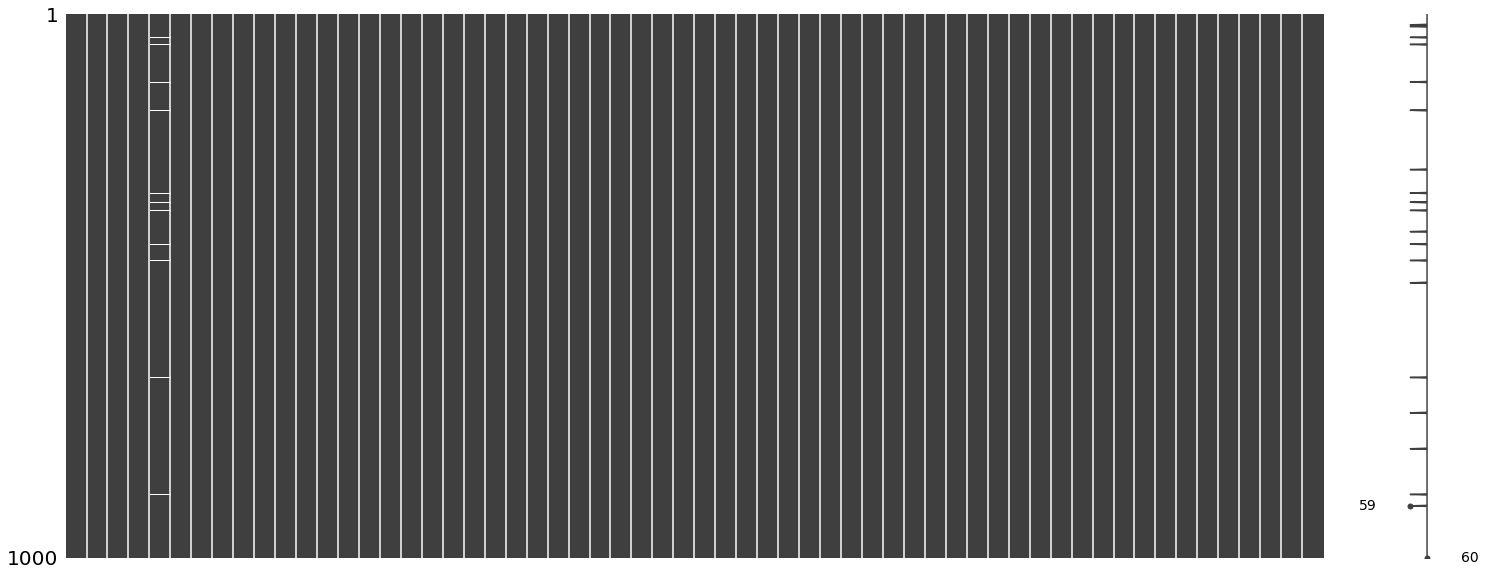

In [ ]:
#Verificar padrões nos dados ausentes após a preparação dos dados
#Abaixo foi realizado uma amostra com apenas 1000 registros, porém, pode ser colocado um número maior
#Quanto maior o número, pior fica a visualização da última coluna que demonstra a ausência de dados
#Fornece uma visão geral dos dados a partir da amostra
ax = msno.matrix(df.sample(1000)) 
ax.get_figure().savefig("/content/drive/My Drive/Colab Notebooks/images/matriz_amostra_ausentes_pos_preparacao.png")

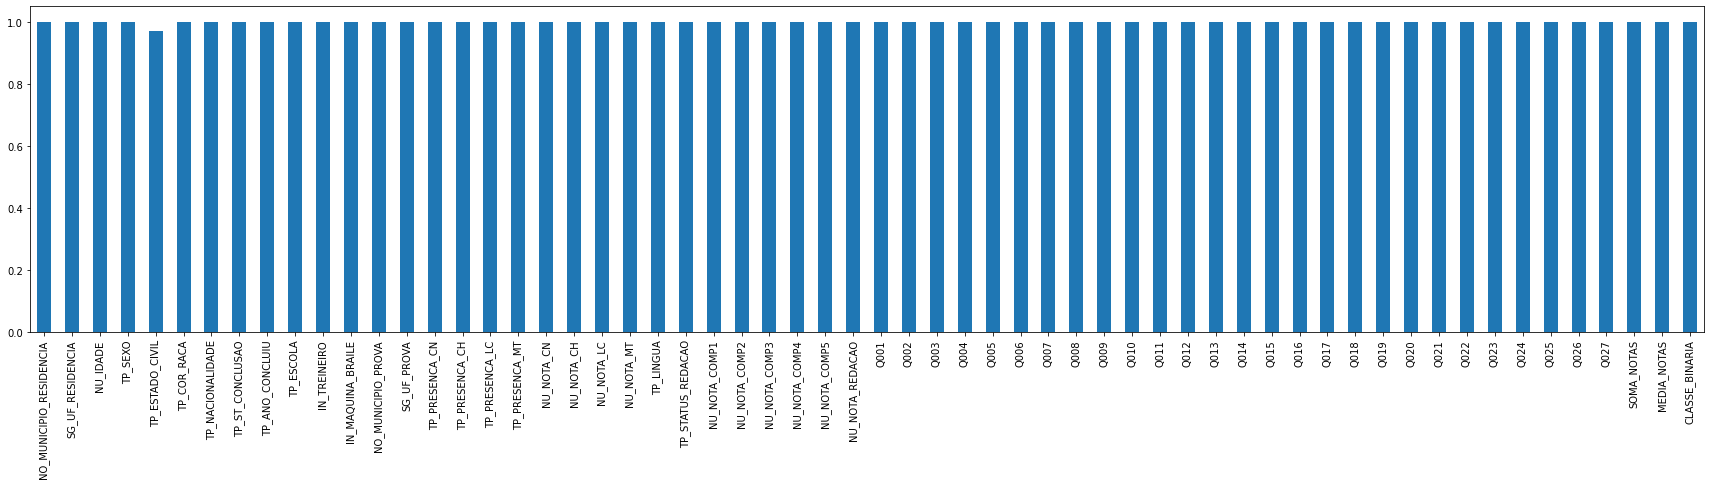

In [ ]:
#Plotar um gráfico de barras para visualizar o quantidade proporcional de itens ausentes após a preparação dos dados
#Lembrando que itens ausentes são candidatos a exclusão
fig, ax = plt.subplots(figsize=(30, 6)) 
(1 - df.isnull().mean()).abs().plot.bar(ax=ax) 
fig.savefig("/content/drive/My Drive/Colab Notebooks/images/grafico_barras_ausentes_pos_preparacao.png", dpi=1200)

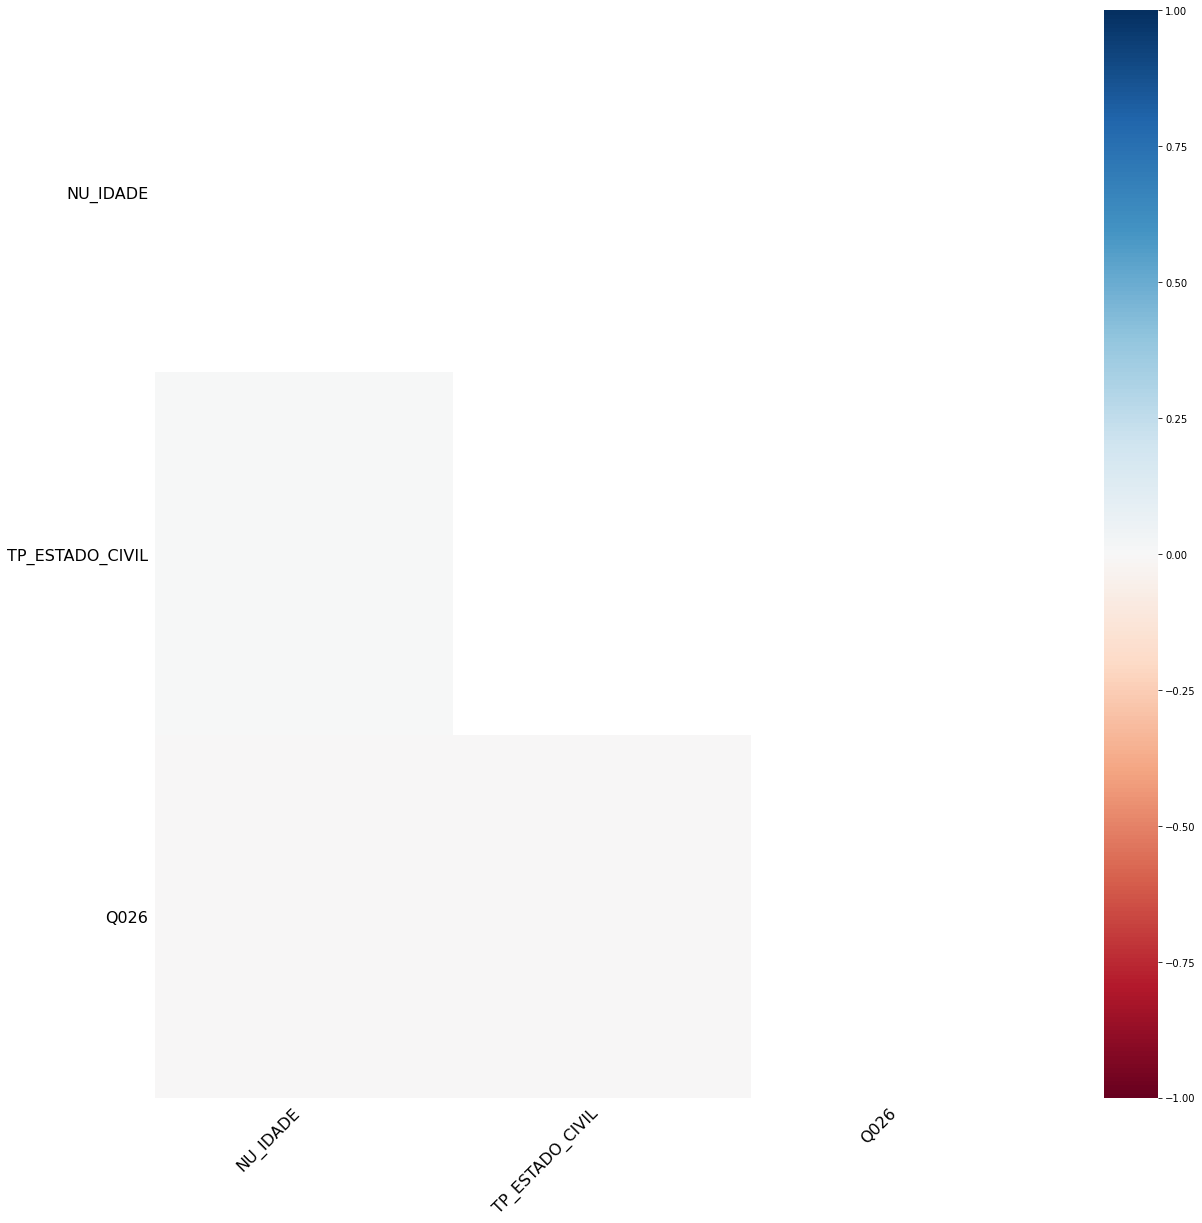

In [ ]:
#Mapa de calor demonstrado a correlação entre os atributos após a preparação dos dados
ax = msno.heatmap(df, figsize=(20, 20)) 
ax.get_figure().savefig("/content/drive/My Drive/Colab Notebooks/images/mapa_calor_ausentes_pos_preparacao.png")

In [ ]:
#Verificar a estatística descritiva dos dados do dataset após a preparação dos dados
df.describe(include='all')

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_MAQUINA_BRAILE,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,SOMA_NOTAS,MEDIA_NOTAS,CLASSE_BINARIA
count,2226585,2226585,2.226564e+06,2226585,2.157635e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2226585,2226585,2226585.0,2226585.0,2226585.0,2226585.0,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2.226585e+06,2226585,2226585,2226585,2226585,2.226585e+06,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226585,2226582,2226585,2.226585e+06,2.226585e+06,2226585
unique,5299,27,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1690,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,6,6,NaN,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2,4,6,NaN,NaN,2
top,São Paulo,SP,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,São Paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,NaN,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B,A,A,NaN,NaN,Nao
freq,99450,353500,NaN,1380034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93262,354594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591240,736578,537864,980709,NaN,595559,2076158,1584045,1135421,1276266,1746910,2102107,1440553,1278142,1983193,1111399,2175535,1816455,1534153,1369593,1713191,693122,1580485,1054891,1670984,1169814,1684820,NaN,NaN,1113410
mean,NaN,NaN,2.112100e+01,NaN,8.282355e-02,2.141577e+00,1.039426e+00,1.587463e+00,2.356464e+00,1.444650e+00,9.203601e-02,1.032972e-05,NaN,NaN,1.0,1.0,1.0,1.0,4.951183e+02,5.727267e+02,5.296453e+02,5.355528e+02,5.167335e-01,1.073395e+00,1.237831e+02,1.051839e+02,1.002335e+02,1.199697e+02,7.638321e+01,5.255533e+02,NaN,NaN,NaN,NaN,3.938752e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.658596e+03,5.317193e+02,NaN
std,NaN,NaN,6.729437e+00,NaN,3.168492e-01,1.013838e+00,2.312771e-01,6.925600e-01,3.590719e+00,7.968638e-01,2.890768e-01,3.213972e-03,NaN,NaN,0.0,0.0,0.0,0.0,7.491003e+01,7.856201e+01,7.194019e+01,1.030956e+02,4.997200e-01,5.868653e-01,2.983854e+01,5.003317e+01,4.710142e+01,3.469740e+01,5.366055e+01,1.876364e+02,NaN,NaN,NaN,NaN,1.459851e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.183201e+02,8.366402e+01,NaN
min,NaN,NaN,1.000000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,1.0,1.0,1.0,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,1.700000e+01,NaN,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,1.0,1.0,1.0,1.0,4.366000e+02,5.167000e+02,4.796000e+02,4.557000e+02,0.000000e+00,1.000000e+00,1.200000e+02,4.000000e+01,4.000000e+01,1.000000e+02,4.000000e+01,3.600000e+02,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.348300e+03,4.696600e+02,NaN
50%,NaN,NaN,1.900000e+01,NaN,0.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,1.0,1.0,1.0,1.0,4.847000e+02,5.867000e+02,5.345000e+